In [1]:
import os 
import sys 
sys.path.append("../")
import numpy as npn 
import matplotlib.pyplot as plt 
from omegaconf import OmegaConf

In [2]:
results = {}
hub_path = '../data/hub'
for data in os.listdir(hub_path):
    d_path = os.path.join(hub_path, data)
    results[data] = {}
    for model in sorted(os.listdir(d_path)):  
        flags = OmegaConf.load(os.path.join(d_path, model, 'config.yaml'))
        print(f"   | {data:30s} | {model:25s} | {flags.best_perplexity: .3f}")
        results[data][model] = flags 

   | electricity-over-16-25-50      | psb-0-0-only              |  5.168
   | electricity-over-16-25-50      | psb-1-12-also             |  1.002
   | electricity-over-16-25-50      | psb-1-12-only             |  1.035
   | electricity-over-16-25-50      | psb-2-12-also             |  1.001
   | electricity-over-16-25-50      | psb-2-12-only             |  1.026
   | electricity-over-16-25-50      | psb-3-12-also             |  1.001
   | electricity-over-16-25-50      | psb-3-12-only             |  1.020
   | electricity-over-16-25-50      | tsic-0-0-only             |  6.583
   | electricity-over-16-25-50      | tsic-1-12-also            |  1.075
   | electricity-over-16-25-50      | tsic-1-12-only            |  1.078
   | electricity-over-16-25-50      | tsic-2-12-also            |  1.074
   | electricity-over-16-25-50      | tsic-2-12-only            |  1.075
   | electricity-over-16-25-50      | tsic-3-12-also            |  1.075
   | electricity-over-16-25-50      | tsic-3-12-onl

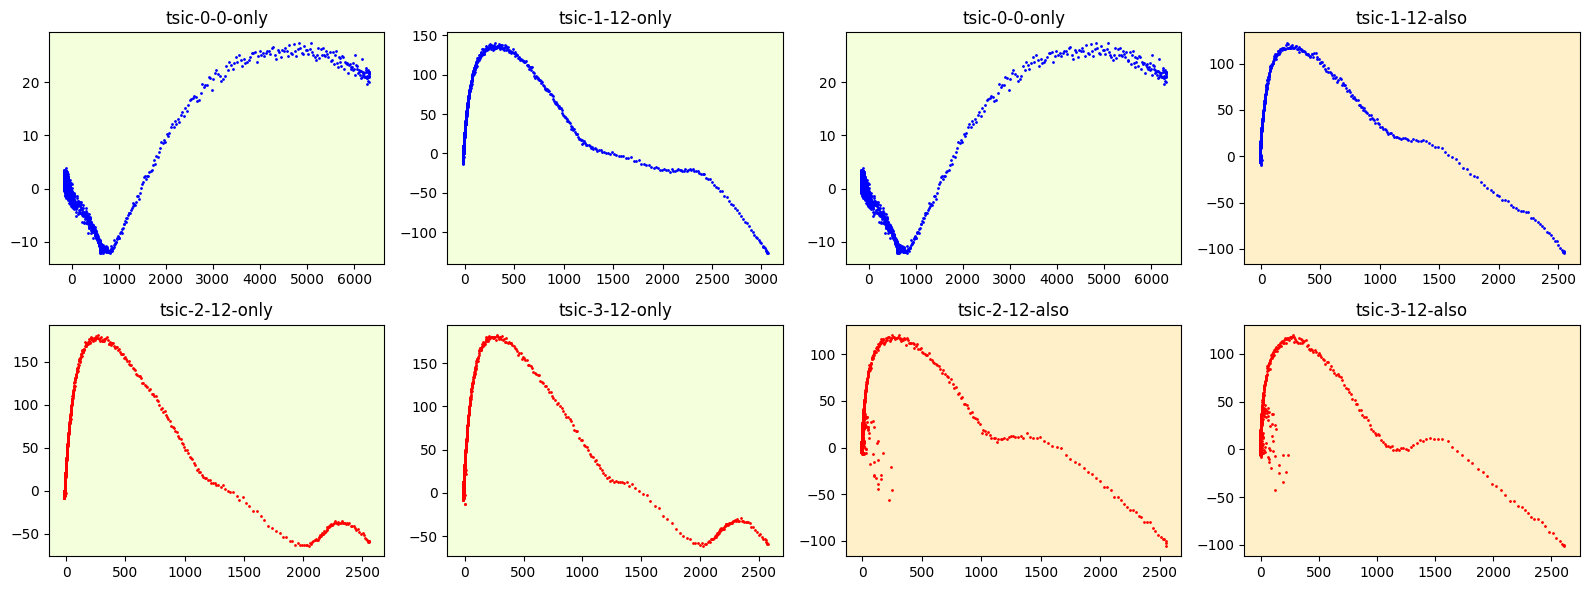

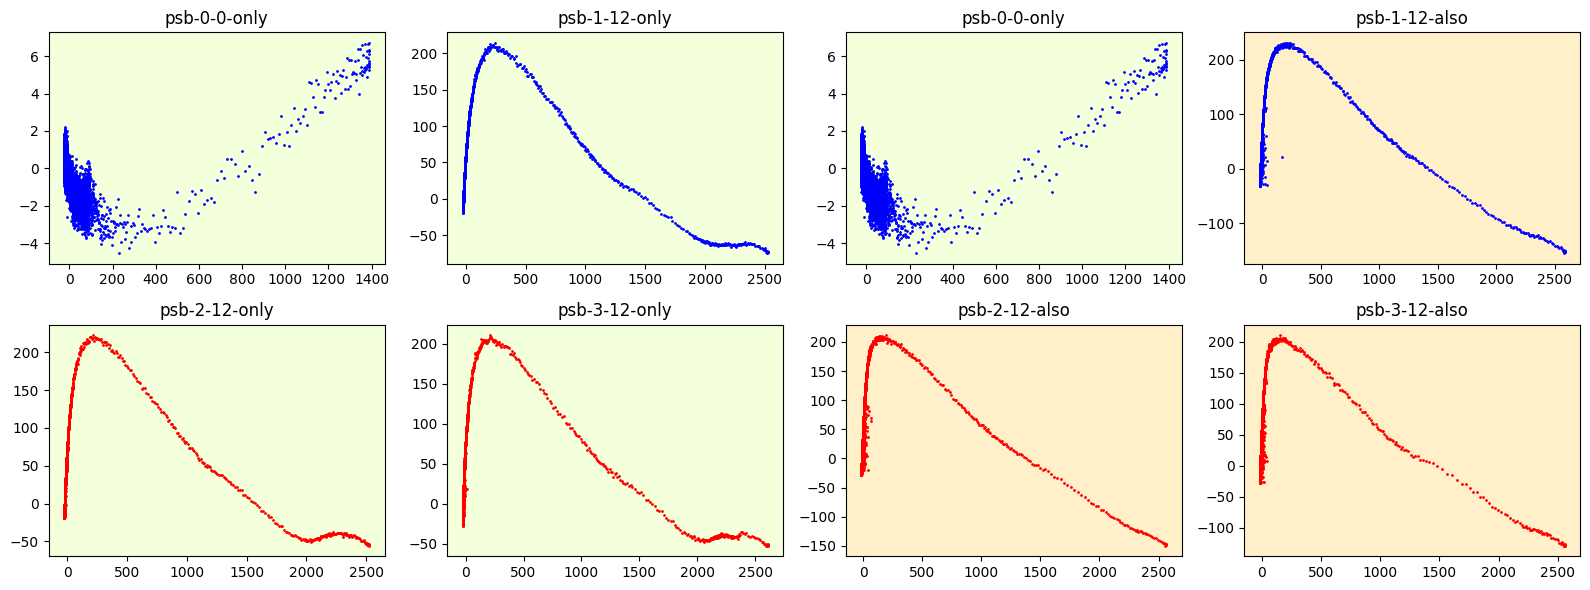

In [3]:
import numpy as np 
from sklearn.decomposition import PCA
full_models = ['tsic-0-0-only', 'tsic-1-12-only', 'tsic-0-0-only' ,'tsic-1-12-also', 
                  'tsic-2-12-only', 'tsic-3-12-only', 'tsic-2-12-also', 'tsic-3-12-also',
                  'psb-0-0-only', 'psb-1-12-only', 'psb-0-0-only', 'psb-1-12-also', 
                  'psb-2-12-only', 'psb-3-12-only', 'psb-2-12-also', 'psb-3-12-also',
                  ]


names = ['tsic', 'psb']
for model_name in names:
    for data in results.keys():
        models = [m for m in full_models  if model_name in m]
        fig, axes = plt.subplots(2, len(models)//2, figsize=(len(models)*2, 6))
        
        axes_flat = axes.flat
        for model in models:
            try:
                d_path = os.path.join(hub_path, data)
                token_loss_for_epoch = np.load(os.path.join(d_path, model, 'token_loss_for_epoch.npy'))
                pced = PCA(2).fit_transform(token_loss_for_epoch)
                ax = next(axes_flat)
                color = 'blue' if ('0-' in model or '1-' in model) else 'red'
                ax.scatter(pced[:,0], pced[:,1], s=1, c=color)
                ax.set_title(model)
                if 'also' in model:
                    ax.set_facecolor((255/255, 240/255, 202/255))
                else:
                    ax.set_facecolor((244/255,255/255,220/255))
            except:
                pass 
                # flags = results[data][model]
        plt.tight_layout()
